In [372]:
import yfinance as yf

In [373]:
tickers = ['RELIANCE.NS', 'TATAMOTORS.NS', 'VBL.NS', 'ICICIBANK.NS', '^NSEI']
data = yf.download(tickers, period='7y', interval='1d', auto_adjust=True)['Close']
data.tail()

[*********************100%***********************]  5 of 5 completed


Ticker,ICICIBANK.NS,RELIANCE.NS,TATAMOTORS.NS,VBL.NS,^NSEI
Date,,,,,
2025-05-19,1449.000000,1440.800049,729.500000,494.799988,24945.449219
2025-05-20,1438.199951,1424.599976,718.900024,480.299988,24683.900391
2025-05-21,1444.699951,1429.199951,726.799988,479.149994,24813.449219
2025-05-22,1442.099976,1409.400024,717.450012,469.549988,24609.699219
2025-05-23,1449.800049,1426.800049,718.250000,488.750000,24853.150391


In [374]:
data.columns = [ticker.split('.')[0] for ticker in data.columns]

In [375]:
data.to_csv("portfolio_data.csv")

In [376]:
import pandas as pd
df= pd.read_csv('portfolio_data.csv', parse_dates=['Date'], index_col='Date')
df.head()

,ICICIBANK,RELIANCE,TATAMOTORS,VBL,^NSEI
Date,,,,,
2018-05-23,278.112061,410.328369,307.539520,39.441334,10430.349609
2018-05-24,283.492432,411.947632,286.867920,40.569027,10513.849609
2018-05-25,281.540222,414.174133,292.333954,40.810673,10605.150391
2018-05-28,284.968445,413.994202,294.470642,41.888363,10688.650391
2018-05-29,276.064667,412.667297,292.830872,42.202229,10633.299805


In [377]:
daily_returns = df.pct_change().dropna()
print(daily_returns.head())

            ICICIBANK  RELIANCE  TATAMOTORS       VBL     ^NSEI
Date                                                           
2018-05-24   0.019346  0.003946   -0.067216  0.028592  0.008005
2018-05-25  -0.006886  0.005405    0.019054  0.005956  0.008684
2018-05-28   0.012177 -0.000434    0.007309  0.026407  0.007874
2018-05-29  -0.031245 -0.003205   -0.005569  0.007493 -0.005178
2018-05-30  -0.017247 -0.001471   -0.019515 -0.011913 -0.001782


C:\Users\HP\AppData\Local\Temp\ipykernel_11060\217338752.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = df.pct_change().dropna()


In [378]:
weights = {'ICICIBANK':0.20,
           'RELIANCE': 0.25,
           'TATAMOTORS':0.20,
           'VBL':0.25,
           '^NSEI':0.10
           }

In [379]:
# define the weights in the same colunm order
weight_list = [weights[ticker] for ticker in daily_returns.columns]

In [380]:
#convert weights to numpy array
import numpy as np

weights_array = np.array(weight_list)

In [381]:
# Multiply each row (daily return) with weights, then sum across columns
portfolio_returns = daily_returns.dot(weights_array)

In [382]:
# Optional: Convert to DataFrame
portfolio_returns = pd.DataFrame(portfolio_returns, columns=['Portfolio Return'])

# Display result
print(portfolio_returns.head())

            Portfolio Return
Date                        
2018-05-24         -0.000639
2018-05-25          0.006142
2018-05-28          0.011178
2018-05-29         -0.006809
2018-05-30         -0.010877


In [383]:
my_investment = 15000

In [384]:
# Continuing from previous step, use your portfolio_returns DataFrame
portfolio_returns['Cumulative Return'] = (1 + portfolio_returns['Portfolio Return']).cumprod()

# Optional: start value ₹100 instead of 1
portfolio_returns['Investment Value (₹)'] = my_investment * portfolio_returns['Cumulative Return']

# View results
print(portfolio_returns.head())


            Portfolio Return  Cumulative Return  Investment Value (₹)
Date                                                                 
2018-05-24         -0.000639           0.999361          14990.415356
2018-05-25          0.006142           1.005499          15082.490575
2018-05-28          0.011178           1.016739          15251.077504
2018-05-29         -0.006809           1.009816          15147.239569
2018-05-30         -0.010877           0.998833          14982.488246


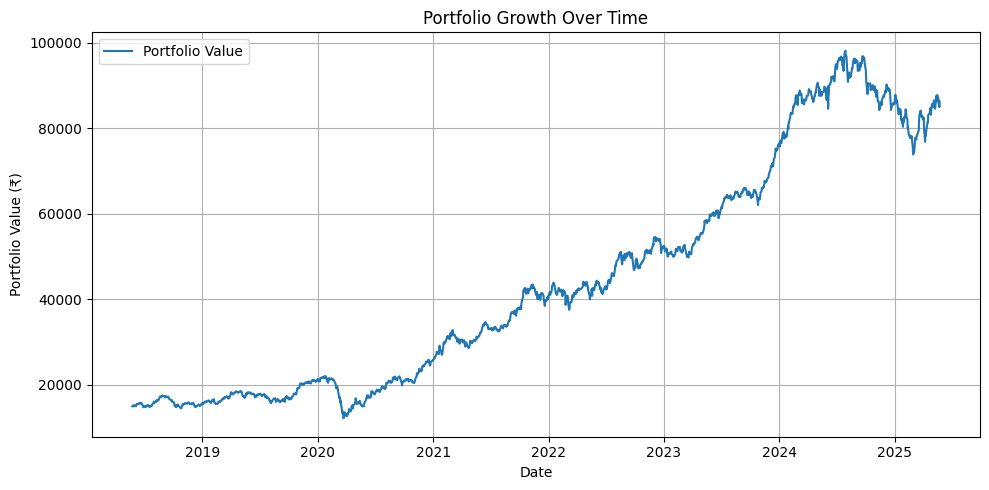

In [385]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(portfolio_returns['Investment Value (₹)'], label='Portfolio Value')
plt.title('Portfolio Growth Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (₹)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [386]:
# Daily standard deviation (risk) of portfolio returns
daily_volatility = portfolio_returns['Portfolio Return'].std()

# Annualized return
annual_return = portfolio_returns['Portfolio Return'].mean() * 252

# Annualized volatility
annual_volatility = portfolio_returns['Portfolio Return'].std() * np.sqrt(252)

print(f'Daily Volatility (Std Dev): {daily_volatility:.6f}')
print(f'Annual Return: {annual_return:.2%}')
print(f'Annual Volatility: {annual_volatility:.2%}')

Daily Volatility (Std Dev): 0.014211
Annual Return: 28.09%
Annual Volatility: 22.56%


In [387]:
#The Sharpe Ratio = (Return - Risk-free rate) / Volatility
#Assume India’s risk-free rate ~ 6% annually → 0.06

risk_free_rate = 0.07
sharpe_ratio = (annual_return - risk_free_rate) / annual_volatility

print(f'Sharpe Ratio: {sharpe_ratio:.2f}')

Sharpe Ratio: 0.93


In [388]:
df_nf = yf.download('^NSEI',period='7y', interval='1d', auto_adjust=True)['Close']
df_nf = pd.DataFrame(df_nf)
df_nf.head()

[*********************100%***********************]  1 of 1 completed


Ticker,^NSEI
Date,
2018-05-23,10430.349609
2018-05-24,10513.849609
2018-05-25,10605.150391
2018-05-28,10688.650391
2018-05-29,10633.299805


In [389]:
nf_returns = df_nf.pct_change().dropna()
nf_cummulative = (1 + nf_returns).cumprod()
nf_cummulative = my_investment * nf_cummulative

print(nf_returns.head())

Ticker         ^NSEI
Date                
2018-05-24  0.008005
2018-05-25  0.008684
2018-05-28  0.007874
2018-05-29 -0.005178
2018-05-30 -0.001782


In [390]:
# Daily standard deviation (risk) of Nifty returns
nf_daily_volatility = nf_returns['^NSEI'].std()

# Annualized return
nf_annual_return = nf_returns['^NSEI'].mean() * 252

# Annualized volatility
nf_annual_volatility = nf_returns['^NSEI'].std() * np.sqrt(252)

print(f'Nifty Daily Volatility (Std Dev): {nf_daily_volatility:.6f}')
print(f'Nifty Annual Return: {nf_annual_return:.2%}')
print(f'Nifty Annual Volatility: {nf_annual_volatility:.2%}')

Nifty Daily Volatility (Std Dev): 0.011258
Nifty Annual Return: 14.31%
Nifty Annual Volatility: 17.87%


In [391]:
nf_sharpe_ratio = (nf_annual_return - risk_free_rate) / nf_annual_volatility

print(f'Nifty Sharpe Ratio: {nf_sharpe_ratio:.2f}')

Nifty Sharpe Ratio: 0.41


In [392]:
# Combine with Your Portfolio
# Use your existing cumulative investment value
portfolio_cummulative = portfolio_returns['Investment Value (₹)']

comparison = pd.concat([portfolio_cummulative, nf_cummulative], axis=1)
comparison.columns = ['Your Portfolio', 'Nifty 50']

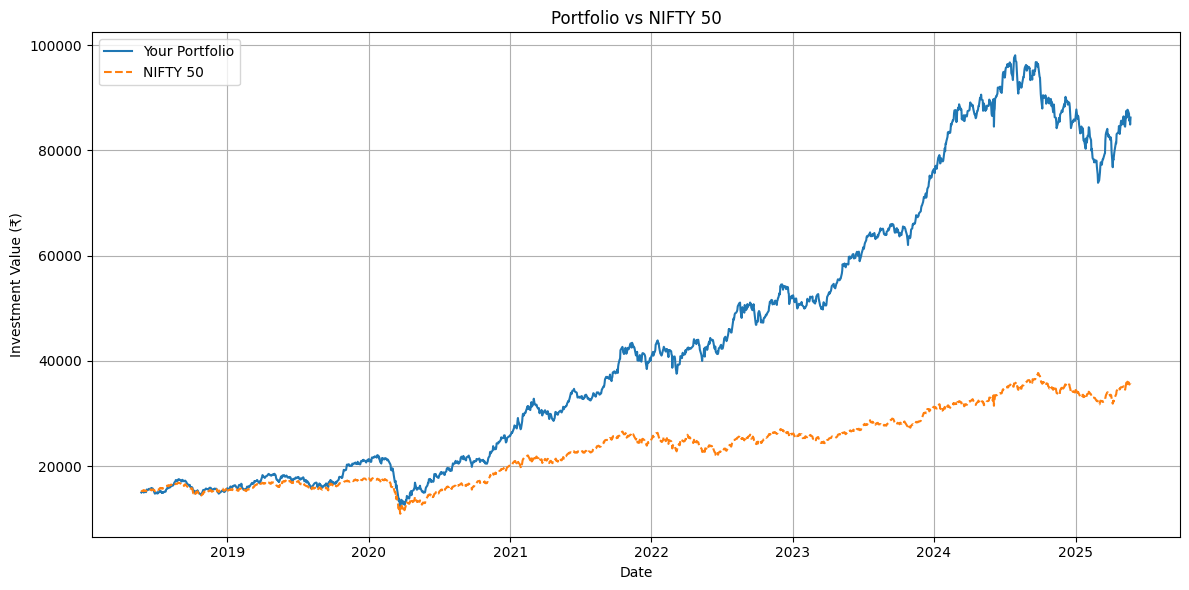

In [393]:
plt.figure(figsize=(12, 6))
plt.plot(comparison['Your Portfolio'], label='Your Portfolio')
plt.plot(comparison['Nifty 50'], label='NIFTY 50', linestyle='--')
plt.title('Portfolio vs NIFTY 50')
plt.xlabel('Date')
plt.ylabel('Investment Value (₹)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Find Outperformed

In [394]:
final_portfolio_value = comparison['Your Portfolio'].iloc[-1]
final_nifty_value = comparison['Nifty 50'].iloc[-1]

print(f'Final Portfolio Value: ₹{final_portfolio_value:.2f}')
print(f'Final Nifty 50 Value: ₹{final_nifty_value:.2f}')

Final Portfolio Value: ₹86237.23
Final Nifty 50 Value: ₹35741.59


In [395]:
outperformance_pct = ((final_portfolio_value - final_nifty_value) / final_nifty_value) * 100

print(f"Portfolio Outperformed by: {outperformance_pct:.2f}%")


Portfolio Outperformed by: 141.28%


##### Annualized Return / Volatility / Sharpe Ratio

In [396]:
print(f'Portfolio Annual Return: {annual_return:.2%}')
print(f'Nifty Annual Return: {nf_annual_return:.2%}')
print("--------------------------------")
print(f'Portfolio Annual Volatility: {annual_volatility:.2%}')
print(f'Nifty Annual Volatility: {nf_annual_volatility:.2%}')
print("--------------------------------")
print(f'Portfolio Sharpe Ratio: {sharpe_ratio:.2f}')
print(f'Nifty Sharpe Ratio: {nf_sharpe_ratio:.2f}')

Portfolio Annual Return: 28.09%
Nifty Annual Return: 14.31%
--------------------------------
Portfolio Annual Volatility: 22.56%
Nifty Annual Volatility: 17.87%
--------------------------------
Portfolio Sharpe Ratio: 0.93
Nifty Sharpe Ratio: 0.41


##### calculate Max Drawdown

In [397]:
# Calculate running maximum (peak value up to each date)
portfolio_running_max = portfolio_cummulative.cummax()
nifty_running_max = nf_cummulative.cummax()

# Calculate drawdown = (current value - peak value) / peak value
portfolio_drawdown = (portfolio_cummulative - portfolio_running_max) / portfolio_running_max
nifty_drawdown = (nf_cummulative - nifty_running_max) / nifty_running_max

# Find max drawdown (worst loss)
max_dd_portfolio = float(portfolio_drawdown.min())
max_dd_nifty = float(nifty_drawdown.min())

print(f"Portfolio Max Drawdown: {max_dd_portfolio:.2%}")
print(f"Nifty Max Drawdown: {max_dd_nifty:.2%}")


Portfolio Max Drawdown: -44.86%
Nifty Max Drawdown: -38.44%


C:\Users\HP\AppData\Local\Temp\ipykernel_11060\2680009427.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  max_dd_nifty = float(nifty_drawdown.min())
